In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [54]:


# Read the CSV file
df = pd.read_csv('energy_results.csv')

# Display the first few rows to verify the import
df.head(20)

,filename,energy
0,resfile.txt,NATAA
1,energy_summary.txt,Tue Feb 4 02:01:37 CST 2025
2,fixedbb_2kdl_GA95_output/GA95.txt,NATRO # Keep all other residues fixed
3,fixedbb_2kdl_GA95_output/fixedbb_2kdl_GA95_out...,2kdl_0004: 1.5274E+02 kcal/mol
4,fixedbb_2kdl_GA95_output/fixedbb_2kdl_GA95_out...,THR 1 THR 1
5,fixedbb_2kdl_GA95_output/fixedbb_2kdl_GA95_out...,THR 1 THR 1
6,fixedbb_2kdl_GA95_output/fixedbb_2kdl_GA95_out...,2kdl_0010: 1.5274E+02 kcal/mol
7,fixedbb_2kdl_GA95_output/fixedbb_2kdl_GA95_out...,THR 1 THR 1
8,fixedbb_2kdl_GA95_output/fixedbb_2kdl_GA95_out...,2kdl_0001: 1.5274E+02 kcal/mol
9,fixedbb_2kdl_GA95_output/fixedbb_2kdl_GA95_out...,THR 1 THR 1


In [55]:
filter_condition = (df['energy'].str.contains('_')) & (df['energy'].str.contains('kcal/mol'))
df = df[filter_condition]

In [56]:
for energy in df['energy']:
    
    print(energy)

2kdl_0004: 1.5274E+02 kcal/mol
2kdl_0010: 1.5274E+02 kcal/mol
2kdl_0001: 1.5274E+02 kcal/mol
2kdl_0008: 1.5274E+02 kcal/mol
2kdl_0009: 1.5274E+02 kcal/mol
2kdl_0005: 1.5274E+02 kcal/mol
2kdl_0003: 1.5274E+02 kcal/mol
2kdl_0002: 1.5274E+02 kcal/mol
2kdl_0006: 1.5274E+02 kcal/mol
2kdl_0007: 1.5274E+02 kcal/mol
2kdl_0009: 1.1350E+02 kcal/mol
2kdl_0010: 1.1350E+02 kcal/mol
2kdl_0003: 1.1350E+02 kcal/mol
2kdl_0008: 1.1350E+02 kcal/mol
2kdl_0007: 1.5090E+02 kcal/mol
2kdl_0005: 1.5090E+02 kcal/mol
2kdl_0004: 1.1350E+02 kcal/mol
2kdl_0006: 1.1350E+02 kcal/mol
2kdl_0002: 1.1350E+02 kcal/mol
2kdl_0001: 1.5090E+02 kcal/mol
2kdm_0001: 2.2797E+02 kcal/mol
2kdm_0005: 2.2797E+02 kcal/mol
2kdm_0006: 2.2797E+02 kcal/mol
2kdm_0003: 1.5515E+02 kcal/mol
2kdm_0008: 2.2629E+02 kcal/mol
2kdm_0010: 2.2797E+02 kcal/mol
2kdm_0002: 2.2629E+02 kcal/mol
2kdm_0004: 2.2797E+02 kcal/mol
2kdm_0009: 2.2797E+02 kcal/mol
2kdm_0007: 2.2797E+02 kcal/mol
2kdm_0006: -2.7687E+01 kcal/mol
2kdm_0009: -1.4192E+02 kcal/mol
2kdm_0

In [57]:
filter_condition = (df['energy'].str.contains('_')) & (df['energy'].str.contains('kcal/mol'))
df = df[filter_condition]
df['replicate'] = df['energy'].str.extract(r'_(\d+):')
df['energy'] = df['energy'].str.extract(r':\s*(-?\d+\.\d+E[+-]\d+)').astype(float)
df['structure'] = df['filename'].str.extract(r'_([^_]+)_[^/]+/')
df['sequence'] = df['filename'].str.extract(r'_[^_]+_([^_]+)_')
df.drop('filename', axis=1)

,energy,replicate,structure,sequence
3,152.74,0004,2kdl,GA95
6,152.74,0010,2kdl,GA95
8,152.74,0001,2kdl,GA95
10,152.74,0008,2kdl,GA95
14,152.74,0009,2kdl,GA95
...,...,...,...,...
181,465.75,0006,2kdl,GB77
182,490.17,0008,2kdl,GB77
184,490.17,0005,2kdl,GB77
187,490.17,0003,2kdl,GB77


In [58]:
mean_table = df.pivot_table(
        values='energy',
        index='structure',
        columns='sequence',
        aggfunc=np.mean  
    )
std_table = df.pivot_table(
        values='energy',
        index='structure',
        columns='sequence',
        aggfunc=np.std  
    )

In [62]:
order = ['GA77','GA95','GB95','GB77']
mean_table = mean_table[order]
std_table = std_table[order]
mean_table

sequence,GA77,GA95,GB95,GB77
structure,,,,
2kdl,124.72000,152.7400,446.5600,487.011
2kdm,-14.41088,-67.0159,-64.9742,220.352


In [88]:
seqdict = {'2kdl':'GA95','2kdm':'GB95'}

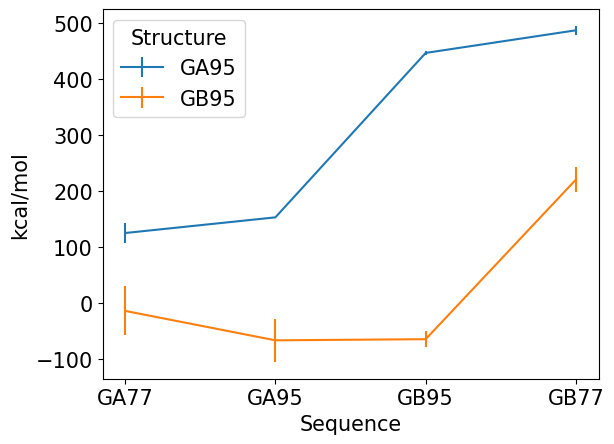

In [105]:
for structure in mean_table.index:
    mean_energies = mean_table.loc[structure].to_numpy()
    std_energies = std_table.loc[structure].to_numpy()
    plt.errorbar(np.arange(len(mean_energies)),mean_energies, yerr=std_energies,label = seqdict[structure])

plt.xticks(np.arange(len(mean_energies)),order,fontsize=15)
plt.yticks(fontsize=15)
plt.legend(title='Structure',title_fontsize=15,fontsize=15)
plt.ylabel('kcal/mol',fontsize=15)
plt.xlabel('Sequence',fontsize=15)

plt.show()

In [79]:
np.arange(len(mean_table.loc[structure].to_numpy()))

array([0, 1, 2, 3])

In [65]:
mean_table['structure']

KeyError: 'structure'